<a href="https://colab.research.google.com/github/kapibara3chi/Make_Design_Structure_Matrix/blob/main/DSM_main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install streamlit
# !pip install pyngrok

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 47.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 KB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 75.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 KB 16.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 KB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 KB 7.2 MB/s eta 0:00:00
  Created wheel for validators: filename=validators-0.20.0-py3-none-any.whl size=19579 sha256=a20d298a0850acd654e52416db712f20534a4ced6810b4b106daa7af5830d3dc
  Stored in directory: /root/.cache/pip/wheels/2d/f0/a8/1094fca7a7e5d0d12ff56e0c64675d72aa5cc81a5fc200e849
Successfully built validators


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# from pyngrok import ngrok

# public_url = ngrok.connect(port='80')
# print(public_url)
# print("****")

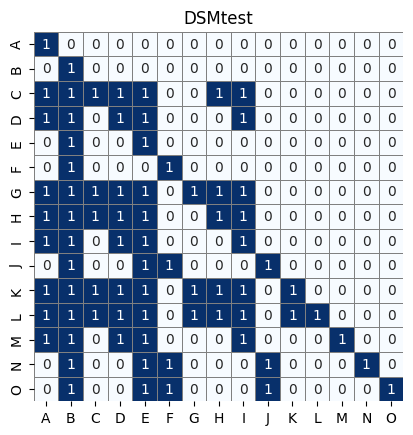

Sequenced DSM:



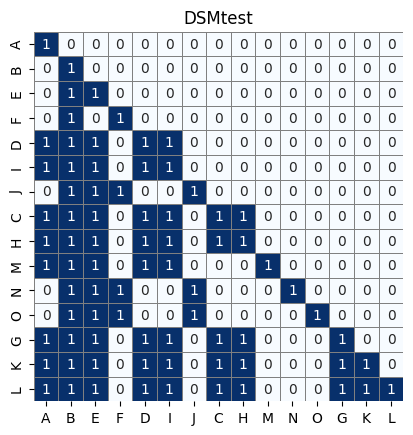

In [ ]:

# ***work***
# %%writefile /content/drive/MyDrive/DSM/my_module.py
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
def make_dsm_by_sns(B,values):

  # # データの作成
 # print(df)

  # Seabornを使ったヒートマップの作成
  # sns.heatmap(df, annot=True, cmap='Blues', fmt='d', linewidths=0.5, linecolor='grey', square=True)

  sns.heatmap(B, annot=True, cbar=False, square=True, cmap="Blues", linewidths=0.5, linecolor="grey",
            xticklabels=values, yticklabels=values)

  plt.title('DSMtest')
  plt.savefig("DSMtest.png",bbox_inches="tight")
  plt.show()

## convert DSM to ReachableMatrix

def toReachableMatrix(DSM):
    size_DSM = DSM.shape[0]
    I = np.eye(size_DSM, dtype=int) # identity matrix
    R1 = np.zeros((size_DSM, size_DSM), dtype=int)
    calcmax = 1000

    for i in range(1, calcmax+1):
        R1 = np.linalg.matrix_power((DSM + I), i)
        Rindex = np.where(R1 > 1)
        R1[Rindex] = np.ones(len(Rindex[0]), dtype=int)

        R2 = np.linalg.matrix_power((DSM + I), (i+1))
        Rindex = np.where(R2 > 1)
        R2[Rindex] = np.ones(len(Rindex[0]), dtype=int)

        if np.array_equal(R1, R2):
            break

    return R1


def OrderReachable(Reachable):
    original = np.copy(Reachable)
    DSMsize = Reachable.shape[0]
    count = 0
    valuesDSM = np.arange(1, DSMsize+1)
    # print(valuesDSM)
    count = 0
    level = np.zeros(DSMsize, dtype=int)
    # print(level)

    while count < DSMsize:
        R = Reachable.copy()
        A = Reachable.T.copy()
        # RA = R.dot(A)
        # R = Reachable
        # A = Reachable.T
        RA = np.multiply(R, A)
        (RAsize, _) = RA.shape
        elements = np.arange(1, RAsize+1)
        # print("R")
        # print(R)
        # print("A")
        # print(A)
        # print("RA")
        # print(RA)
        # print("RA[0]",RA[0,:])
        # print("R[0]",R[0,:])
        # sys.exit()

        for i in range(RAsize):

            if np.array_equal(RA[i,:], R[i,:]):
                    count += 1
                    # print(count)
                    level[count-1] = valuesDSM[i]
                    elements[i] = 0

        elements = elements[elements > 0]
        Reachable = Reachable[elements - 1, :][:, elements - 1]
        valuesDSM = valuesDSM[elements - 1]

    orderedReachable = original[level-1, level-1]

    return orderedReachable, level

def Sequencing(DSM, label):
    cDSM = DSM.copy()
    clabel = label.copy()

    Reachable = toReachableMatrix(cDSM)

    OrderedReachable, level = OrderReachable(Reachable)
    # print(OrderedReachable)
    # print(level)
    # print(type(level))
    # print(cDSM)
    # print(cDSM[0,0])
    # print(cDSM[2,0])

    # level=np.array([ 1 ,2 ,5 ,6 ,4 ,9,10, 3 ,8,13,14,15 ,7,11,12])
    level=level-1
    # print(level[:, np.newaxis])
    SequencedDSM = cDSM[level[:, np.newaxis], level]
    # print(SequencedDSM)
    # print(clabel)
    Sequencedlabel = np.take(label, level)
    # print(Sequencedlabel)
    # print("--------")
    # SequencedDSM = cDSM[level[:, np.newaxis], level-1]
    # Sequencedlabel = clabel[level]

    return SequencedDSM, Sequencedlabel


if __name__ == '__main__':

  # データの作成
  # Check Reachble Matrix
  # DSM = np.array([[0, 0, 0, 0, 1, 0],
  #                 [1, 0, 1, 1, 1, 0],
  #                 [0, 0, 0, 1, 1, 0],
  #                 [0, 0, 1, 0, 0, 0],
  #                 [0, 0, 0, 0, 0, 0],
  #                 [0, 1, 0, 0, 1, 0]])
  # label = ["A", "B", "C", "D", "E", "F"]

  DSM=np.array([[1,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                    [0,1,0,0,0,0,0,0,0,0,0,0,0,0,0],
                    [1,1,1,1,1,0,0,1,1,0,0,0,0,0,0],
                    [1,1,0,1,1,0,0,0,1,0,0,0,0,0,0],
                    [0,1,0,0,1,0,0,0,0,0,0,0,0,0,0],
                    [0,1,0,0,0,1,0,0,0,0,0,0,0,0,0],
                    [1,1,1,1,1,0,1,1,1,0,0,0,0,0,0],
                    [1,1,1,1,1,0,0,1,1,0,0,0,0,0,0],
                    [1,1,0,1,1,0,0,0,1,0,0,0,0,0,0],
                    [0,1,0,0,1,1,0,0,0,1,0,0,0,0,0],
                    [1,1,1,1,1,0,1,1,1,0,1,0,0,0,0],
                    [1,1,1,1,1,0,1,1,1,0,1,1,0,0,0],
                    [1,1,0,1,1,0,0,0,1,0,0,0,1,0,0],
                    [0,1,0,0,1,1,0,0,0,1,0,0,0,1,0],
                    [0,1,0,0,1,1,0,0,0,1,0,0,0,0,1]])
  label = ["A", "B", "C", "D", "E", "F","G","H","I","J","K","L","M","N","O"]
  make_dsm_by_sns(DSM,label)

  SequencedDSM, Sequencedlabel = Sequencing(DSM, label)
  print("Sequenced DSM:\n")
  make_dsm_by_sns(SequencedDSM,Sequencedlabel)
  # print("Sequenced label:\n", Sequencedlabel)
  # df = pd.DataFrame(data=B, columns=value_l,index=value_l)

In [ ]:
# !streamlit run --server.port 80 /content/drive/MyDrive/DSM/my_script.py >/dev/null &

In [ ]:
%%writefile /content/drive/MyDrive/DSM/app.py
import sys
sys.path.append('/content/drive/MyDrive/DSM')
import streamlit as st
import my_module
txt=my_module.test()
st.title(txt)

# simple_streamlit_app.py

import numpy as np
import pandas as pd
import streamlit as st
df = pd.DataFrame( np.random.randn(10, 4), columns=['a2', 'b2', 'c','d'] )
st.title("Simple Streamlit App")

st.dataframe(df)
st.write("📈　Line-Chart")
st.line_chart(df)

if st.checkbox('👓 Show DataFrame (with highlight_max)'):
 st.table(df.style.highlight_max(axis=0))


Overwriting /content/drive/MyDrive/DSM/app.py


In [ ]:
# from google.colab import files
# files.view("/content/drive/MyDrive")
# files.view("my_script.py")

In [ ]:
# !streamlit run /content/drive/MyDrive/DSM/my_script.py & sleep 3 && npx localtunnel --port 8501
!streamlit run /content/drive/MyDrive/DSM/app.py & sleep 3 && npx localtunnel --port 8501




  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.172.69.88:8501

npx: installed 22 in 2.286s
your url is: https://young-towns-lie-34-172-69-88.loca.lt
  Stopping...
^C
